In [1]:
import pandas as pd
import numpy as np

# .shift ( )
- shifts all the columns of a dataframe down/up according to the number specified

- it just moves the datapoints keeping the index intact
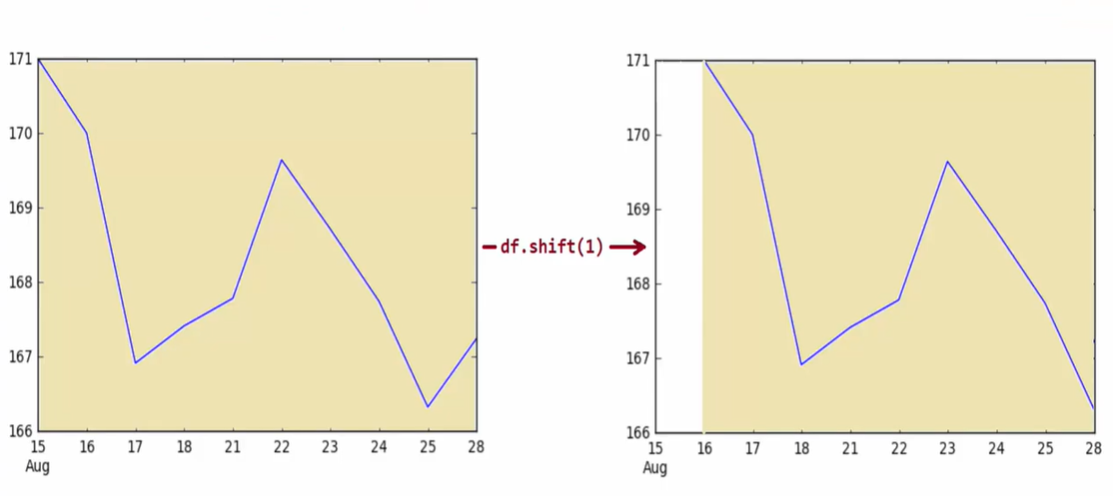

In [16]:
df = pd.read_csv('./Datasets/Csv/Facebook.csv', parse_dates=['Date'], index_col='Date')
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [17]:
# shifting the Price column down once

df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [18]:
# shifting the Price column down 5 times

df.shift(5)

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,NaN
2017-08-18,NaN
2017-08-21,NaN
2017-08-22,171.00
2017-08-23,170.00
2017-08-24,166.91
2017-08-25,167.41


In [19]:
# shifting the Price column up 5 times

df.shift(-5)

,Price
Date,
2017-08-15,169.64
2017-08-16,168.71
2017-08-17,167.74
2017-08-18,166.32
2017-08-21,167.24
2017-08-22,NaN
2017-08-23,NaN
2017-08-24,NaN
2017-08-25,NaN


# Why Shifting is useful
- it is used in date time analysis to find per day changes / changes after few time period

In [20]:
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [23]:
# calculating changes from previous day

df2 = df.copy()

df2['Previous day price'] = df.Price.shift(1)
df2['Price change from previous day'] = df2['Price'] - df2['Previous day price']
df2

,Price,Previous day price,Price change from previous day
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


In [26]:
# calculating percentage change in price from 5 days before

df3 = df.copy()

df3['% change in price from 5 days before'] = (df.Price - df.Price.shift(5))/df.Price.shift(5)*100
df3

,Price,% change in price from 5 days before
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,NaN
2017-08-17,166.91,NaN
2017-08-18,167.41,NaN
2017-08-21,167.78,NaN
2017-08-22,169.64,-0.795322
2017-08-23,168.71,-0.758824
2017-08-24,167.74,0.497274
2017-08-25,166.32,-0.651096


# .tshift ( )
- instead of shifting all columns like .shift( ), it shifts the index

#### For datetime index, the index must have a frequency for tshift to work

In [28]:
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [30]:
# the dataframe's index frequency is NONE : freq=None

df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [35]:
# converting the frequency to Business days

df.index = pd.date_range('2017-08-15',periods=10,freq='B')
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [37]:
# Shifting the index (Date) 5 days ahead

df.tshift(5)

<ipython-input-37-c4a1b3083393>:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(5)


,Price
2017-08-22,171.00
2017-08-23,170.00
2017-08-24,166.91
2017-08-25,167.41
2017-08-28,167.78
2017-08-29,169.64
2017-08-30,168.71
2017-08-31,167.74
2017-09-01,166.32
2017-09-04,167.24
